In [1]:
import numpy as np
import tncontract as tn
import qutip as qt
import time

import sys
sys.path.append("../src/")

from simulation_utils import *
from plotting_utils import *

In [2]:
n_sites = 4 # Number of sites
psi = tn.onedim.init_mps_allzero(n_sites, 2) # Initial state all zeros
cct_depth = 1000

# Limit the bond dimension
# chi = int(2 * np.log2(n_sites))
chi = None

t = time.time()

for _ in range(int(cct_depth/3)):
    # Two-qubit layer
    cct_layer_1, cct_layer_2 = random_two_qubit_gate_ladder(n_sites)
    psi = tn.onedim.contract_mps_mpo(psi,cct_layer_1)
    psi.left_canonise(chi=chi)
    psi = tn.onedim.contract_mps_mpo(psi,cct_layer_2)
    psi.left_canonise(chi=chi)

    # Single qubit layer
    cct_layer = random_single_qubit_gate_layer(n_sites)
    psi = tn.onedim.contract_mps_mpo(psi,cct_layer)
    psi.left_canonise(chi=chi)

psi.left_canonise(normalise=True)
print("Took {:.2f}s to run {} circuits on {} qubits".format(time.time()-t, cct_depth, n_sites))

Took 1.88s to run 1000 circuits on 4 qubits


In [3]:
for s in psi:
    print(s.shape)

(2, 1, 2)
(2, 2, 4)
(2, 4, 8)
(8, 2, 1)


In [4]:
psi_vec = tn.onedim.contract_virtual_indices(psi)
psi_vec.fuse_indices('physout','physout')

psi_vec.shape

(16,)

In [5]:
prob_vec = abs(psi_vec.data.reshape(-1, 1))**2

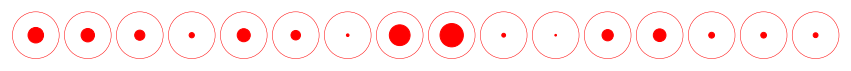

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
speckle_pattern(prob_vec, ax=ax)